 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [93]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import csv
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [94]:
# Reading whale returns
whale = pd.read_csv("whale_returns.csv")

In [95]:
whale.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [96]:
# Count nulls
whale.isnull().mean() * 100


Date                           0.00000
SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [97]:
# Drop nulls
whale = whale.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [98]:
# Reading algorithmic returns
algo = pd.read_csv("algo_returns.csv")
algo.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [99]:
# Count nulls
whale.isnull().mean() * 100

Date                           0.0
SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

In [100]:
# Drop nulls
algo = algo.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [101]:
# Reading S&P TSX 60 Closing Prices
sp = pd.read_csv("sp_tsx_history.csv")
sp.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [102]:
# Check Data Types
sp.dtypes
whale.dtypes


Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [103]:
# Fix Data Types
sp_col = sp.columns
sp[sp_col] = sp[sp_col].replace({'\$':'', '\,':''}, regex = True)

sp['Date'] = pd.to_datetime(sp['Date'])
whale['Date'] = pd.to_datetime(whale['Date'])
algo['Date'] = pd.to_datetime(algo['Date'])
sp['Close'] = pd.to_numeric(sp['Close'])

In [104]:
# Calculate Daily Returns
sp['Close'] = sp['Close'].pct_change()

In [105]:
# Drop nulls
sp = sp.dropna()
sp.isnull().sum()

Date     0
Close    0
dtype: int64

In [106]:
# Rename `Close` Column to be specific to this portfolio.
sp = sp.rename(columns = {'Close':'S&P TSX'})
sp

,Date,S&P TSX
1,2012-10-02,0.001701
2,2012-10-03,-0.002563
3,2012-10-04,0.007137
4,2012-10-05,-0.002305
5,2012-10-09,-0.011709
...,...,...
1813,2019-12-20,0.003188
1814,2019-12-23,0.000600
1815,2019-12-24,0.003003
1816,2019-12-27,-0.000695


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [61]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

df = whale.merge(algo, on='Date')
df = df.merge(sp, on='Date')
df.set_index('Date', inplace=True)


df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'daily returns'}, xlabel='Date'>

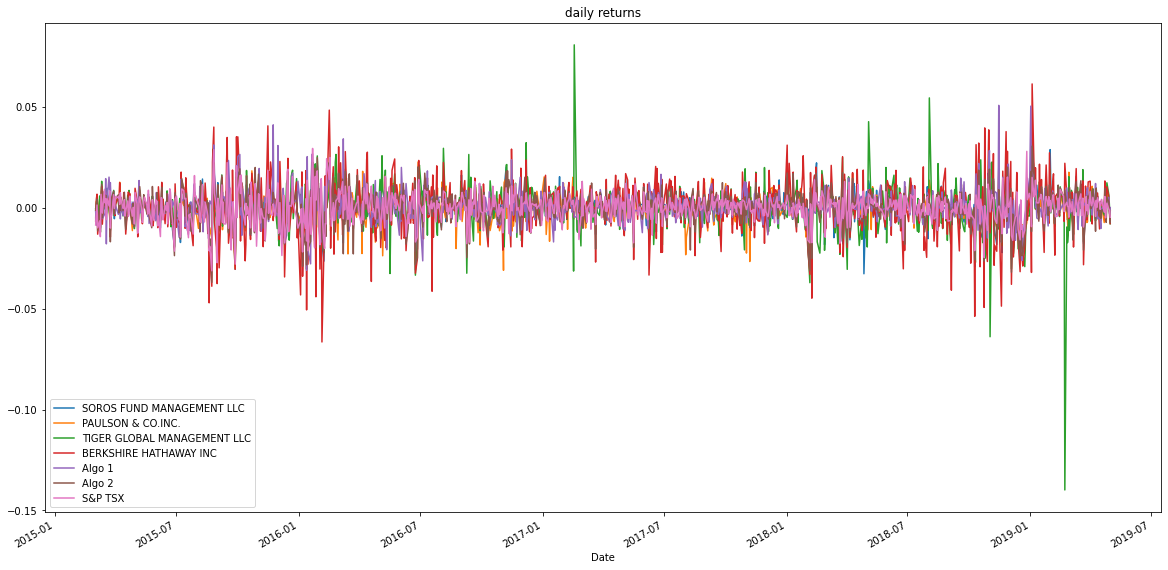

In [62]:
# Plot daily returns of all portfolios
df.plot(figsize=(20,10), title="daily returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'cumulative returns'}, xlabel='Date'>

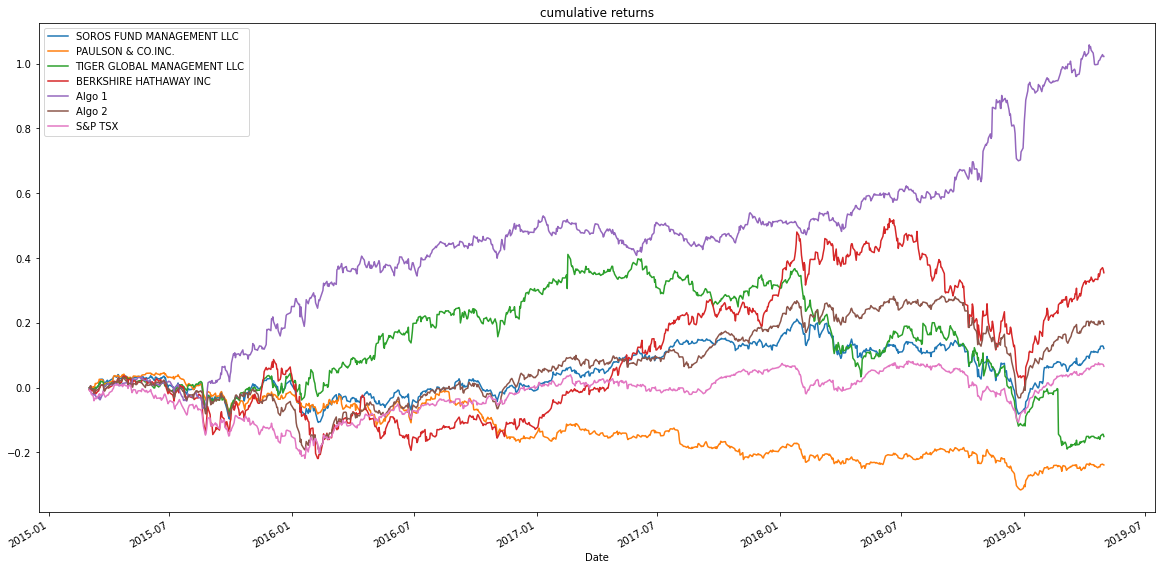

In [63]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="cumulative returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate thsandard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

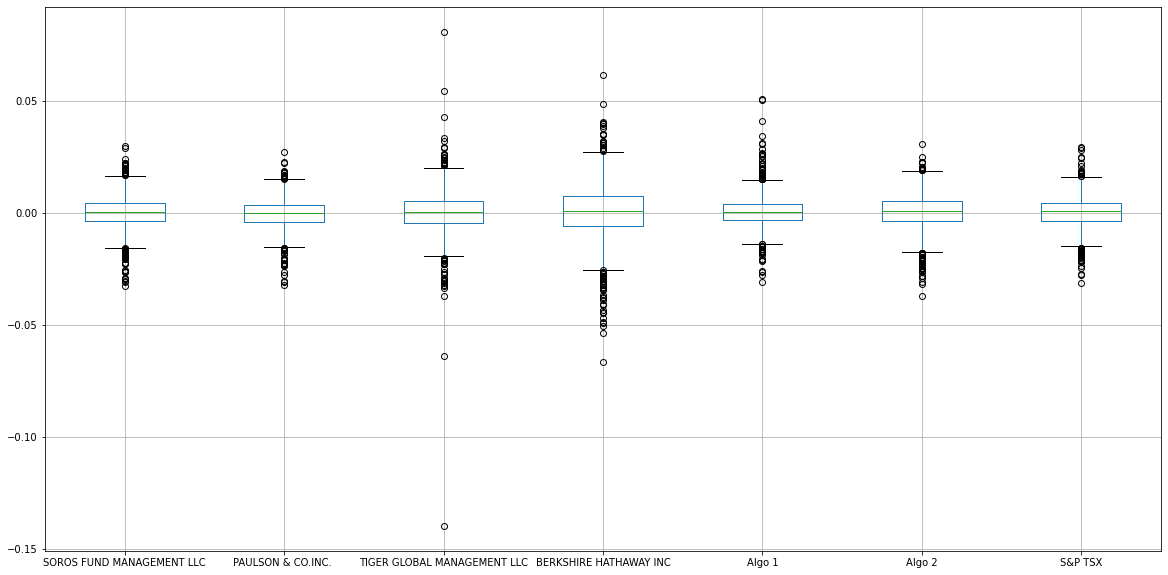

In [64]:
# Box plot to visually show risk
df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [65]:
# Calculate the daily standard deviations of all portfolios
df.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [66]:
# Calculate  the daily standard deviation of S&P TSX 60
S_P_std = df["S&P TSX"].std()

# Determine which portfolios are riskier than the S&P TSX 60
df.std() > S_P_std
        

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [67]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = df.std() * np.sqrt(252)
ann_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day rolling std'}, xlabel='Date'>

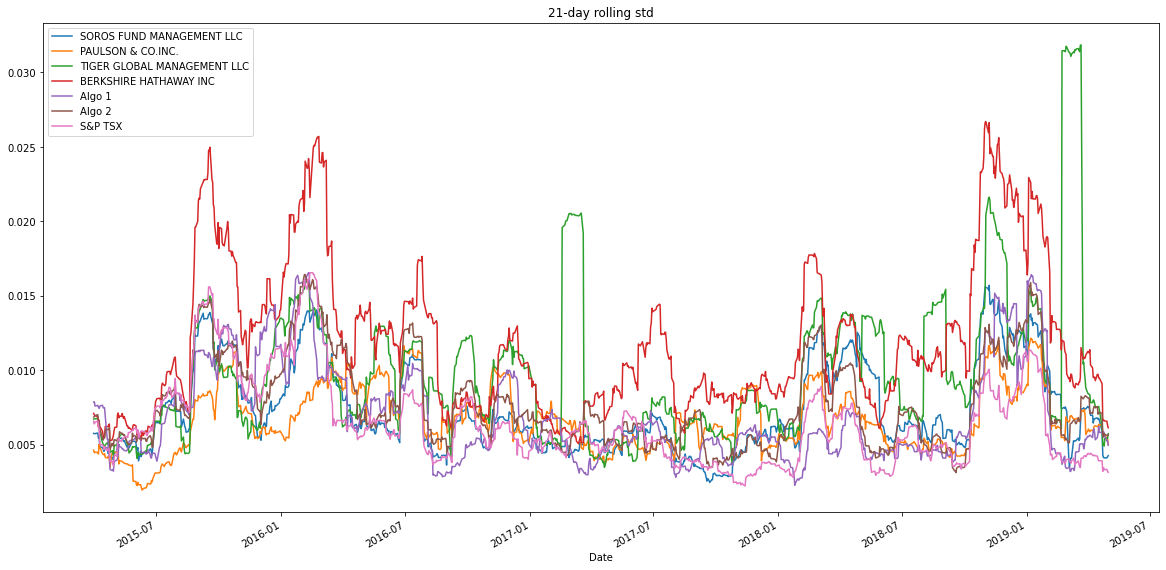

In [68]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
r21_std = df.rolling(window=21).std()
# Plot the rolling standard deviation
r21_std.plot(figsize=(20,10), title="21-day rolling std")

### Calculate and plot the correlation

In [69]:
# Calculate the correlation
df_correl = df.corr()

# Display de correlation matrix
df_correl


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

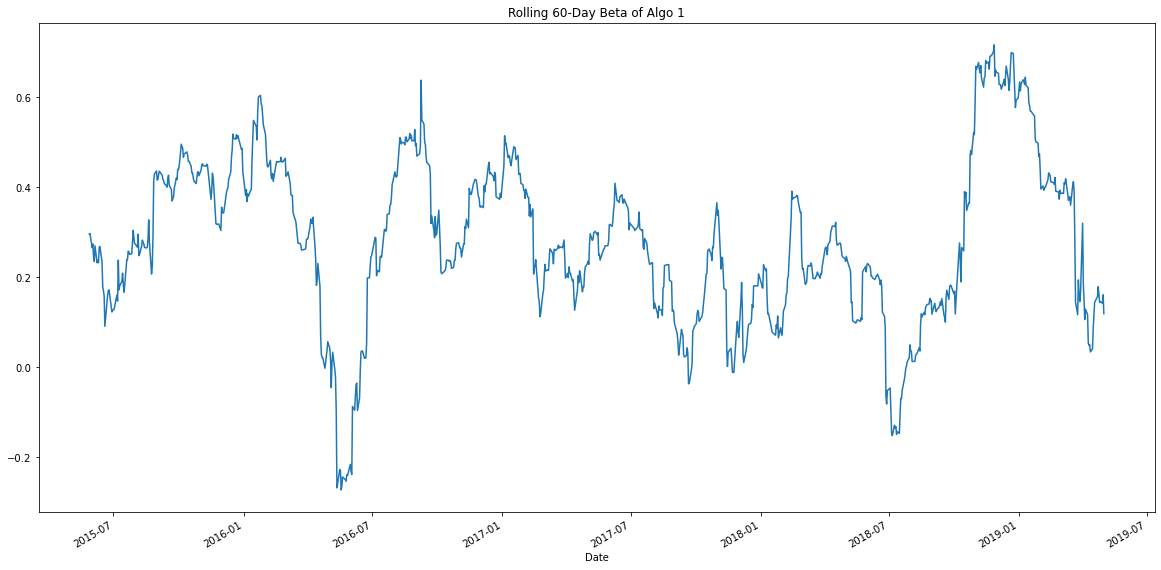

In [70]:
# Calculate covariance of a single portfolio
covar = df['Algo 1'].rolling(window=60).cov(df['S&P TSX'])

# Calculate variance of S&P TSX
variance = df['S&P TSX'].rolling(window=60).var()

# Computing beta
beta = covar / variance

# Plot beta trend
beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [71]:
# Use `ewm` to calculate the rolling window
df_ewm = df.ewm(halflife=21).mean() 
df_ewm.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [72]:
# Annualized Sharpe Ratios
sharpe = (df.mean() * 252) / (df.std() * np.sqrt(252))
sharpe

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

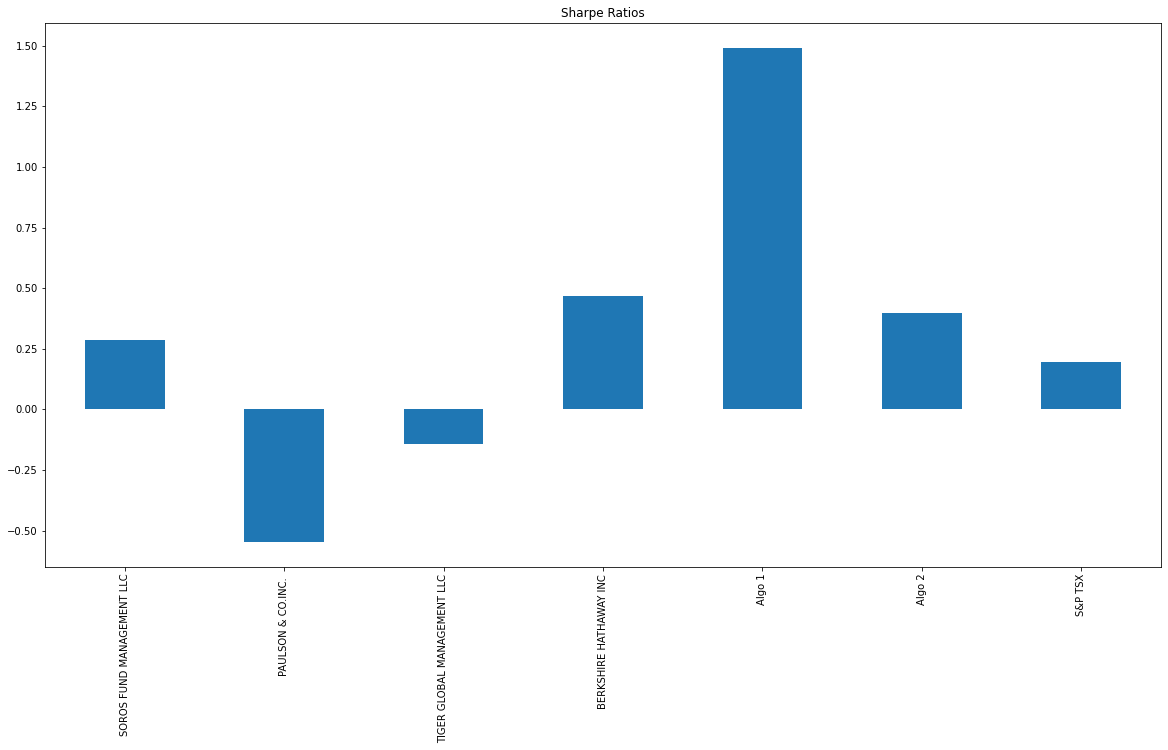

In [73]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot.bar(figsize=(20,10), title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [74]:
# Reading data from 1st stock
aapl = pd.read_csv("AAPL.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)


In [75]:
# Reading data from 2nd stock
amzn = pd.read_csv("AMZN.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [76]:
# Reading data from 3rd stock
cba = pd.read_csv("CBA.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [77]:
# Combine all stocks in a single DataFrame
cba.columns = ["CBA"]
aapl.columns = ["AAPL"]
amzn.columns = ["AMZN"]

# Drop Symbols Column, so we have only closing columns for all 3 dataframes 
cba = cba.drop(columns=["CBA Symbol"], errors ="ignore")
aapl = aapl.drop(columns=["AAPL Symbol"], errors ="ignore")
amzn = amzn.drop(columns=["AMZN Symbol"], errors ="ignore")

# Concatenate the 3 stock dataframes into one portfolio df
my_port = pd.concat([cba, aapl, amzn], axis="columns", join="inner")
my_port

,CBA,AAPL,AMZN
Date,,,
2015-12-09 16:00:00,0.06,28.91,664.79
2015-12-10 16:00:00,0.08,29.04,662.32
2015-12-14 16:00:00,0.06,28.12,657.91
2015-12-23 16:00:00,0.06,27.15,663.70
2016-01-08 16:00:00,0.08,24.24,607.05
...,...,...,...
2021-11-29 16:00:00,0.14,160.24,3561.57
2021-11-30 16:00:00,0.15,165.30,3507.07
2021-12-02 16:00:00,0.14,163.76,3437.36


In [78]:
# Reset Date index
my_port = my_port.reset_index()
my_port.dtypes

Date    datetime64[ns]
CBA            float64
AAPL           float64
AMZN           float64
dtype: object

In [79]:
# Reorganize portfolio data by having a column per symbol
columns = ["Date", "CBA", "AAPL", "AMZN"]
my_port.columns =  columns

# Set Index to Date and Sort
my_port['Date'] = my_port['Date'].dt.date
my_port['Date'] = pd.to_datetime(my_port['Date'])
my_port.set_index('Date', inplace=True)

my_port


,CBA,AAPL,AMZN
Date,,,
2015-12-09,0.06,28.91,664.79
2015-12-10,0.08,29.04,662.32
2015-12-14,0.06,28.12,657.91
2015-12-23,0.06,27.15,663.70
2016-01-08,0.08,24.24,607.05
...,...,...,...
2021-11-29,0.14,160.24,3561.57
2021-11-30,0.15,165.30,3507.07
2021-12-02,0.14,163.76,3437.36


In [80]:
# Calculate daily returns

my_port_returns = my_port.pct_change()

# Drop NAs
my_port_returns = my_port_returns.dropna()

# Display sample data
my_port_returns.head()

,CBA,AAPL,AMZN
Date,,,
2015-12-10,0.333333,0.004497,-0.003715
2015-12-14,-0.250000,-0.031680,-0.006658
2015-12-23,0.000000,-0.034495,0.008801
2016-01-08,0.333333,-0.107182,-0.085355
2016-01-14,-0.125000,0.026403,-0.023145


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [81]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_port_weights = my_port_returns.dot(weights)

# Display sample data
my_port_weights = my_port_weights.to_frame(name="My Portfolio")

my_port_weights


,My Portfolio
Date,
2015-12-10,0.111372
2015-12-14,-0.096113
2015-12-23,-0.008565
2016-01-08,0.046932
2016-01-14,-0.040581
...,...
2021-11-29,-0.004136
2021-11-30,0.029235
2021-12-02,-0.031953


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [82]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = df.merge(my_port_weights, how='outer', on="Date")

all_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN
...,...,...,...,...,...,...,...,...
2021-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004136
2021-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029235
2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.031953


In [83]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()

all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2015-12-10,0.000473,0.002977,0.000594,-0.000510,0.002731,0.000396,0.006106,0.111372
2015-12-14,-0.004105,-0.000152,0.012146,0.004763,-0.013886,-0.008425,-0.007385,-0.096113
2015-12-23,0.008939,0.008066,0.018596,0.010677,0.017169,0.009708,0.015444,-0.008565
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000222,0.046932
2016-01-14,0.012926,0.012863,0.003902,0.015141,0.025340,0.010145,0.013608,-0.040581
...,...,...,...,...,...,...,...,...
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.004943,-0.021981
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,0.002119,0.048550
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-0.000803,-0.038384


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [84]:
# Calculate the annualized `std`
ann_std = all_returns.std() * np.sqrt(252)
ann_std

SOROS FUND MANAGEMENT LLC      0.114320
PAULSON & CO.INC.              0.113062
TIGER GLOBAL MANAGEMENT LLC    0.157622
BERKSHIRE HATHAWAY INC         0.197371
Algo 1                         0.111222
Algo 2                         0.121555
S&P TSX                        0.099708
My Portfolio                   0.708565
dtype: float64

### Calculate and plot rolling `std` with 21-day window

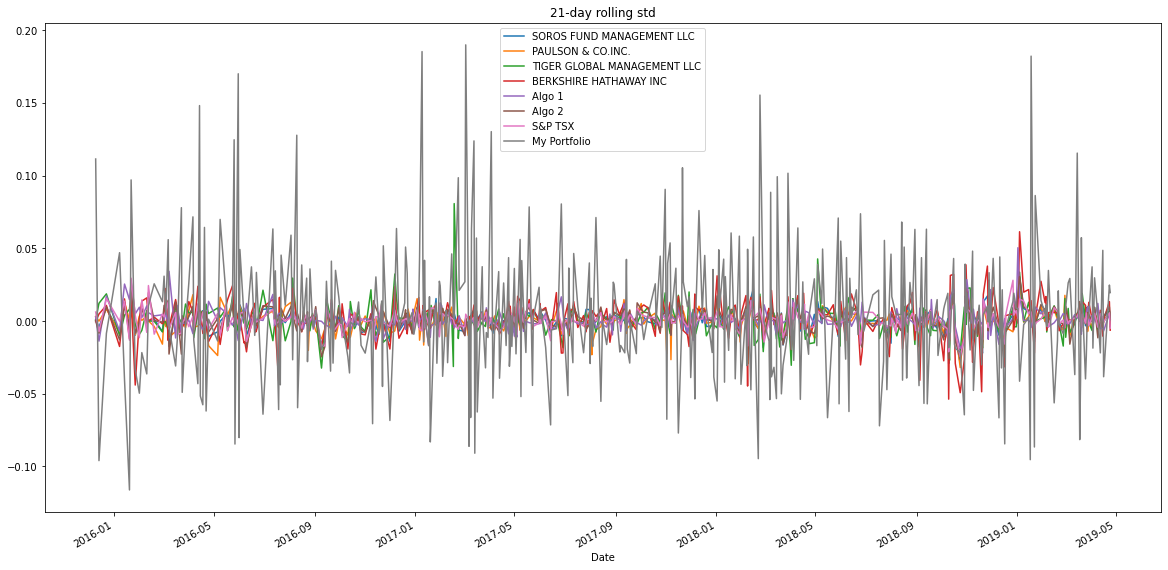

In [85]:
# Calculate rolling standard deviation
r21_std = all_returns.rolling(window=21).std()
r21_std

# Plot rolling standard deviation
r21_std = all_returns.plot(figsize=(20,10), title="21-day rolling std")

### Calculate and plot the correlation

<AxesSubplot:>

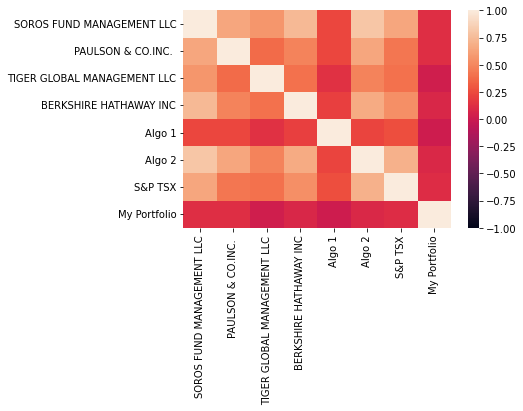

In [86]:
# Calculate and plot the correlation

all_correlation = all_returns.corr()
sns.heatmap(all_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}, xlabel='Date'>

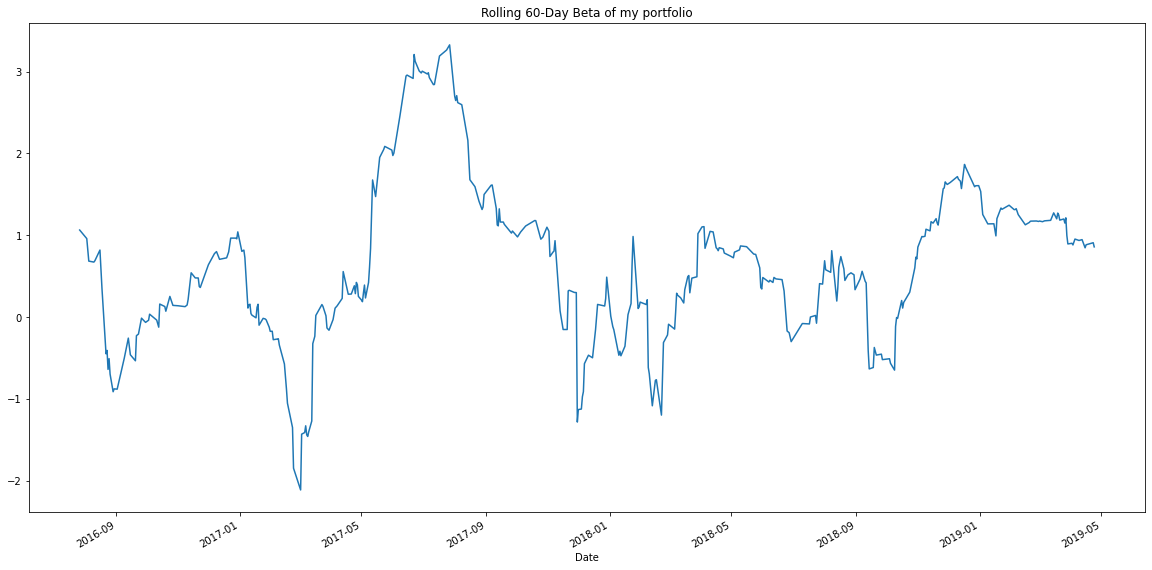

In [90]:
# Calculate and plot Beta
my_cov = all_returns['My Portfolio'].rolling(window=60).cov(all_returns['S&P TSX'])
my_var = all_returns['S&P TSX'].rolling(window=60).var()

my_beta = my_cov/my_var
my_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of my portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [91]:
# Calculate Annualized Sharpe Ratios
my_sharpe = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
my_sharpe

SOROS FUND MANAGEMENT LLC      1.122728
PAULSON & CO.INC.             -0.338045
TIGER GLOBAL MANAGEMENT LLC    0.867432
BERKSHIRE HATHAWAY INC         1.540575
Algo 1                         1.865844
Algo 2                         1.627749
S&P TSX                        1.161376
My Portfolio                   1.690954
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of My Portfolio'}>

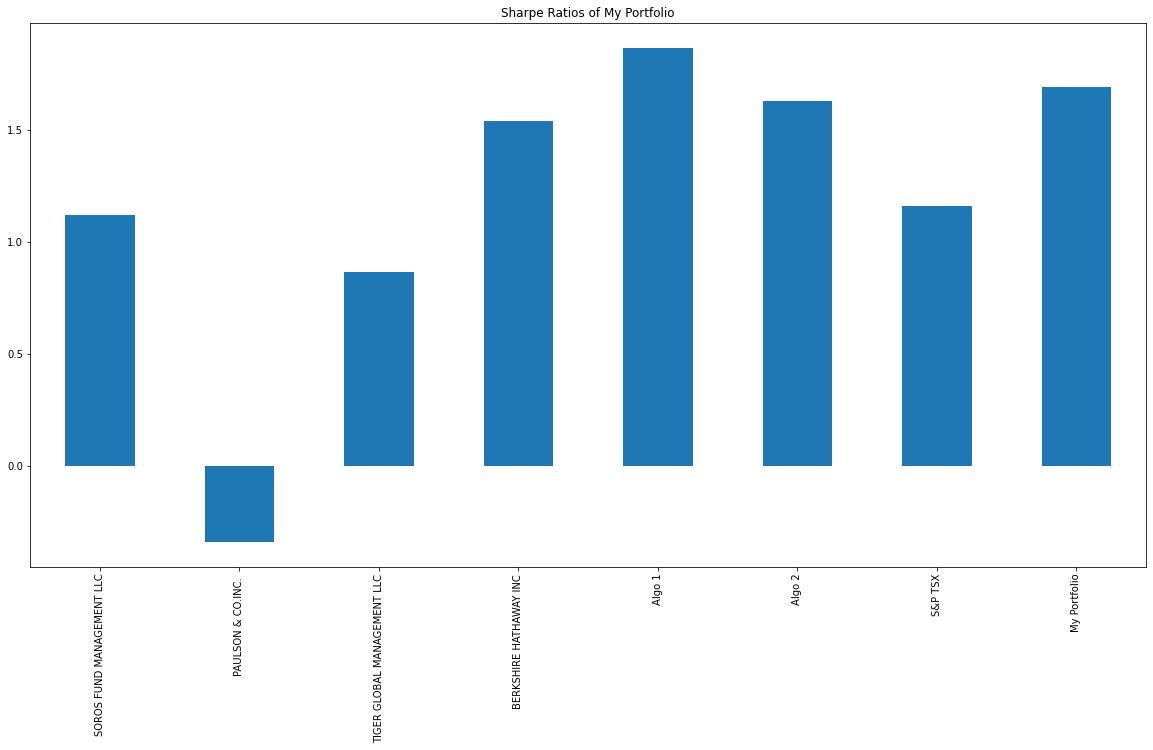

In [92]:
# Visualize the sharpe ratios as a bar plot
my_sharpe.plot.bar(figsize=(20,10), title="Sharpe Ratios of My Portfolio")

### How does your portfolio do?
The data can be compared to establish the performance of my custom porfolio. Through analysis of the Sharpe ratios, my portfolio performs quite well as opposed to other portfolios. The standard deviation of the custom portfolio is quite high meaning it has a low spread and can be considered less volatile than the opposed.